In [63]:
import numpy as np
import emcee,os
from my_script import mol_data,run_myradex_of,best_fitting
from multiprocessing import Pool

In [64]:
basic_info=np.loadtxt('references/total_info_v2.csv',delimiter=',',dtype=str)
co_mol=mol_data('/home/zj/Documents/radex_mol/','co.dat')

In [ ]:
def map_Xco(i):
    Tkin,nH2,Kvir,size=10**sample_reshape[i]
    Tbs=run_myradex_of(Tkin=Tkin,nH2=nH2,abundance_Kvir=1e-4/Kvir,molecule=co_mol,Tbg=2.73)[0]
    Xco=2.65*nH2**0.5/Tbs[0]/Kvir
    return Xco
for sourcename in basic_info[1:,0]:
    print(sourcename)
    sampfile='MCMC_samples/CO_SLED/%s_samples.h5'%sourcename.replace(' ','')
    if os.path.isfile(sampfile):
        sampler = emcee.backends.HDFBackend(sampfile, read_only=True)
        samples=sampler.get_chain(discard=0)
        sample_reshape=samples.reshape([samples.shape[0]*samples.shape[1],samples.shape[2]])
        nsamp=len(sample_reshape)
        Xcos=np.zeros(nsamp)
        p=Pool(14)
        Xcos=p.map(map_Xco,np.arange(nsamp))
        p.close()
        p.join()
        np.save('MCMC_samples/CO_SLED/%s_Xco.npy'%sourcename.replace(' ',''),Xcos)

NGC1068
IC1623AB
NGC0232A
ESO244
NGC1614
IRAS09022
IRAS08355
ESO339
NGC6926
NGC3110A
IRAS13120
UGC02238
MCG-05-12-00
UGC03094
NGC1572
NGC2342A
NGC2342B
MCG02-20
IRASF18293
NGC0034
MRK331
ESO353-G020
CGCG436
NGC2623
NGC5104


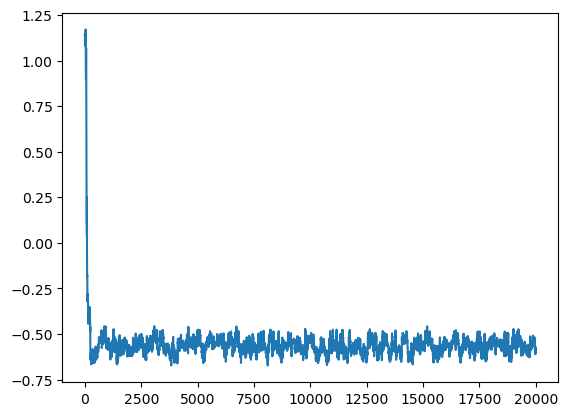

In [62]:
Xcos=np.load('MCMC_samples/CO_SLED/NGC5194_Xco.npy')
import matplotlib.pyplot as plt
import corner
plt.plot(np.log10(Xcos.reshape(20000,20)[:,8]))

In [58]:
for sourcename in basic_info[1:,0]:
    print(sourcename)
    sampfile='MCMC_samples/CO_SLED/%s_samples.h5'%sourcename.replace(' ','')
    if os.path.isfile(sampfile):
        Xcos=np.load('MCMC_samples/CO_SLED/%s_Xco.npy'%sourcename.replace(' ','')).reshape(20000,20)[7000:]
        print(best_fitting(np.log10(Xcos.reshape(Xcos.shape[0]*Xcos.shape[1]))))

NGC1068
[-0.44209299260939927, -0.13514758161448492, 0.14939858284950402]
IC1623AB
[-0.3930405012083111, -0.1688160797183264, 0.1845366397295267]
NGC0232A
[0.5423024128403968, -0.586639537872616, 0.745971337984761]
ESO244
[0.008811141798102983, -0.30903657589759226, 0.4178369079334655]
NGC1614
[-0.3914273582268216, -0.17602596131781156, 0.2422585950932963]
IRAS09022
[0.24571128659319957, -0.27197100602098107, 0.49907868100391023]
IRAS08355
ESO339
NGC6926
NGC3110A
[0.11063132867830311, -0.3510304473481233, 0.3483836938422123]
IRAS13120
[-0.15694176437708535, -0.20824513893618635, 0.3027285682462516]
UGC02238
[0.02662996911593256, -0.3513181588536028, 0.28990773969309347]
MCG-05-12-00
UGC03094
[0.09702747106822114, -0.42331683146342236, 0.4588483175934081]
NGC1572
[-0.19448795475459124, -0.14135875786297042, 0.29583656927452084]
NGC2342A
[-0.07461416258218154, -0.3309413398621902, 0.4412319861237285]
NGC2342B
MCG02-20
[0.21008189142519268, -0.3118367557662137, 0.36452861403174136]
IRASF1